# 1. Combine DataFrames in Python (Pandas):

Use the Pandas library in Python to read each CSV file into a DataFrame.
Concatenate or merge these DataFrames into a single DataFrame.


In [1]:
import pandas as pd
import glob

# Read all CSV files into DataFrames
all_files = glob.glob('/workspaces/codespaces-jupyter/visualization-of-csranking/detailed/Institutions_*_*.csv')
df_list = [pd.read_csv(file) for file in all_files]

# Concatenate DataFrames into a single DataFrame
combined_df = pd.concat(df_list, ignore_index=True)


In [3]:
print(combined_df.head())

   Rank                      University  Faculty Count  Publication Count
0     1           University of Toronto            101                8.7
1     2          University of Waterloo             97                7.0
2     3  University of British Columbia             59                4.3
3     4         Simon Fraser University             51                4.0
4     5               McGill University             24                2.5


# 2. Visualization Tools:

Use tools like Matplotlib, Seaborn, or Plotly to create various visualizations.
(using Seaborn for a scatter plot):

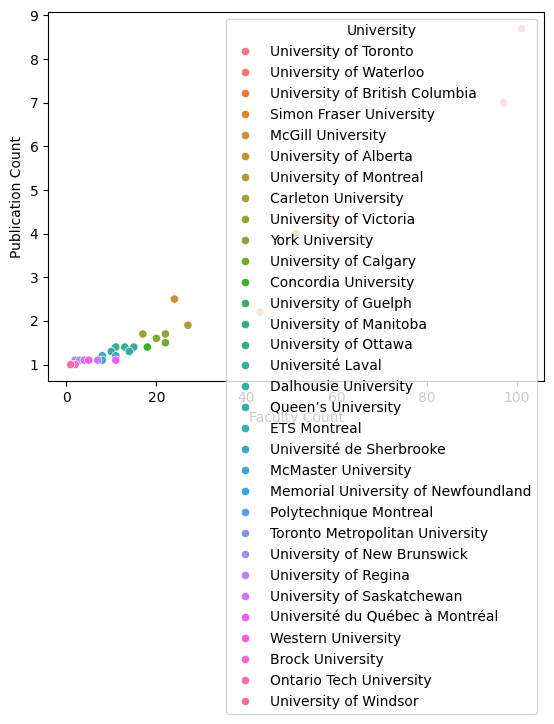

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Faculty Count', y='Publication Count', hue='University', data=combined_df)
plt.show()


# 4. Interactive Dashboards:

Create interactive dashboards using tools like Dash (by Plotly) or Tableau.
Dash allows you to create web-based applications with interactive visualizations.
Example (using Dash for an interactive scatter plot):

In [6]:
import dash
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(
        id='scatter-plot',
        figure={
            'data': [
                {'x': combined_df['Faculty Count'], 'y': combined_df['Publication Count'], 'mode': 'markers', 'type': 'scatter'}
            ],
            'layout': {'title': 'Faculty Count vs Publication Count'}
        }
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)


/tmp/ipykernel_4216/778128745.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/tmp/ipykernel_4216/778128745.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


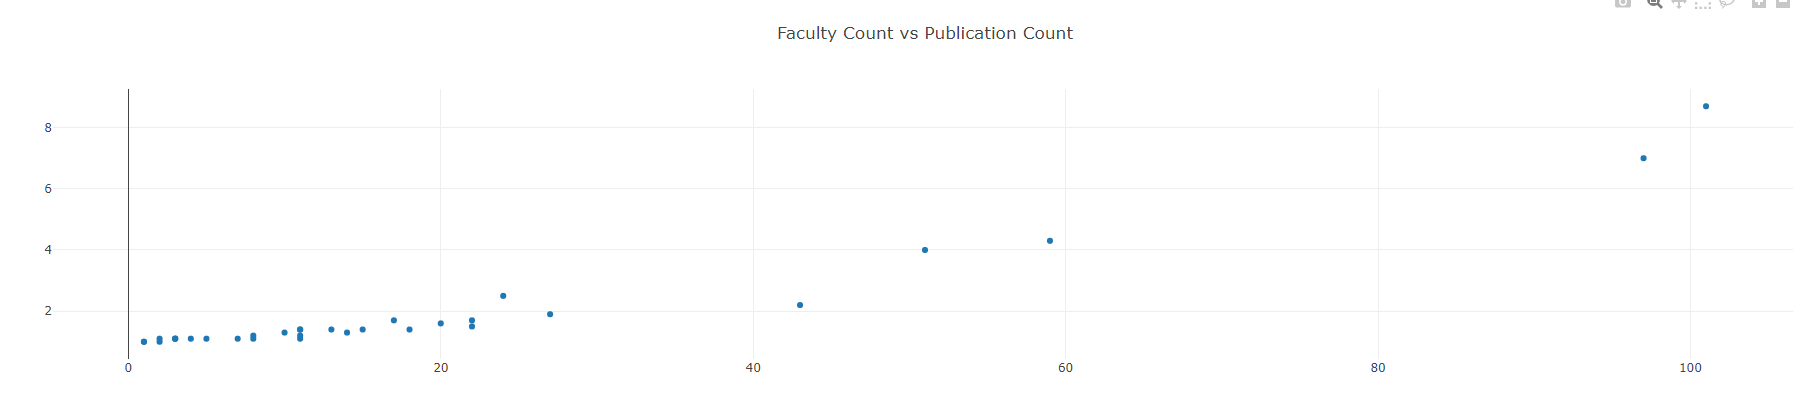

# 4. Geospatial Visualization:
If your data includes geographical information, consider using geospatial visualization tools like Folium or Plotly's Mapbox.

Example (using Folium for a simple map):

In [ ]:
import folium

m = folium.Map(location=[combined_df['Latitude'].mean(), combined_df['Longitude'].mean()], zoom_start=4)
for index, row in combined_df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['University']).add_to(m)

m.save('map.html')

# 5. Cluster Analysis:

- Explore cluster analysis using algorithms like K-Means to identify patterns in the data.
- Example (using K-Means with scikit-learn):

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
combined_df['Cluster'] = kmeans.fit_predict(combined_df[['Faculty Count', 'Publication Count']])
